In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from htrace import Parse
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_formats = ['svg']
sns.set_style("whitegrid")

In [53]:
data_path={
    'dfsioe_r': 'data/dfsioe_r/',
    'dfsioe_w': 'data/dfsioe_w/',
    'kmeans': 'data/kmeans/',
    'pagerank': 'data/pagerank/',
    'terasort': 'data/terasort/',
    'wordcount': 'data/wordcount/'
}
samplers = [
            'p0.1',
            'a',  
            'l', 
            't'
]
sampler_map = {
    'p0.1': 'PR(0.1)',
    'a': 'always',
    'l': 'bump',
    't': 'tbuck'
}
zh_samplers = ['全采样','限制采样','令牌桶采样','概率采样(0.1)','概率采样(0.01)']
bench = 'data/pagerank/'

In [69]:
names = ['completeFile', 'ClientNamenodeProtocol#complete']

In [70]:
def clean_data(bench, sampler):
    a = pd.read_csv(bench+sampler+'/1s.csv')
    a.drop(['Unnamed: 0'], axis=1, inplace=True)
    a['sampler'] = sampler_map[sampler]
    return a

In [71]:
com =  [clean_data(bench, sampler) for sampler in samplers]

In [72]:
c = pd.concat(com)

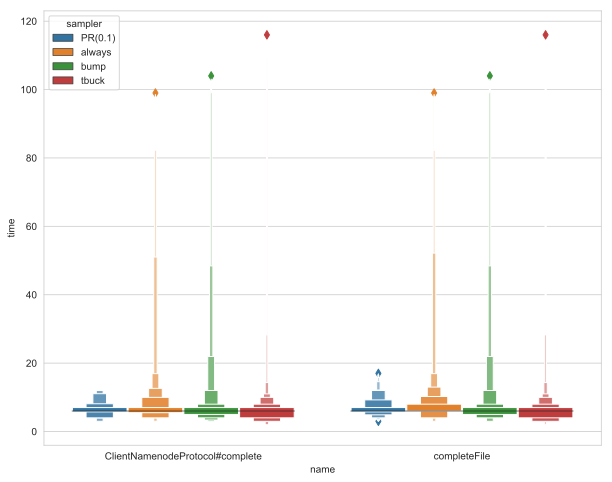

In [73]:
fig, axes = plt.subplots(figsize = (10, 8))
d =c[c.apply(lambda x: x['name'] in names, axis=1)]
sns.boxenplot(x='name', y='time', hue='sampler', data=d)